In [2]:
import osmnx as ox
import pandas as pd

def func(x):
    return x[0]

def func_1(x):
    gdf_1 = ox.geocode_to_gdf(x, by_osmid=True)
    return gdf_1[['lat', 'lon']]

def func_tags(tags, city):
    gdf = ox.features_from_place(city, tags)
    gdf = gdf[['name', 'geometry', 'nodes']]
    gdf = gdf.dropna().reset_index()
    gdf['n_osmid'] = gdf['element_type'].apply(func) + gdf['osmid'].astype(str)
    ex = [gdf['n_osmid'].apply(func_1).iloc[:].values[x] for x in range(len(gdf))]
    dfs = pd.concat(ex, axis=0).reset_index(drop=True)
    gdf = gdf.merge(dfs, on=dfs.index)
    gdf = gdf.drop('key_0', axis=1)
    gdf = gdf[['name', 'lat', 'lon', 'geometry', 'nodes']]
    gdf['kind_of'] = list(tags.keys())[0]
    return gdf

In [3]:
city = 'Saint Petersburg'
tags_port = {'port' : 'cargo'}
tags_aeroway = {'aeroway' : ['aerodrome','heliport', 'airstrip']}
tags_landuse = {'landuse' : 'railway'}
tags_build = {'building' : 'warehouse'}
full_df = pd.concat([func_tags(tags_port, city), func_tags(tags_aeroway, city), func_tags(tags_landuse, city), func_tags(tags_build, city)], ignore_index=True)

In [4]:
full_df.head()

,name,lat,lon,geometry,nodes,kind_of
0,Третья стивидорная компания,59.878970,30.213249,"POLYGON ((30.20885 59.88225, 30.20867 59.88216...","[1495854450, 1495854446, 1495854443, 149585441...",port
1,Нева-Металл,59.884243,30.203732,"POLYGON ((30.21001 59.88024, 30.21024 59.88037...","[1495854361, 1495854367, 1495854405, 149585443...",port
2,Первый Контейнерный Терминал,59.879917,30.205881,"POLYGON ((30.21649 59.87602, 30.21588 59.87632...","[29003159, 29003160, 29003162, 1546437843, 149...",port
3,Первая стивидорная компания,59.900097,30.223462,"POLYGON ((30.23869 59.91024, 30.23647 59.90991...","[1496678744, 1496678741, 1496678737, 149667873...",port
4,Петербургский нефтяной терминал,59.883287,30.175183,"POLYGON ((30.16799 59.88702, 30.16898 59.88680...","[[[29003480, 29003481, 29003482, 7709497986, 7...",port


In [5]:
G = ox.graph_from_place("Saint Petersburg", retain_all=True, simplify = True, network_type='all')
lat = list(full_df['lat'].values)
lon = list(full_df['lon'].values)
full_df['new_nodes'] = ox.distance.nearest_nodes(G, lon, lat)
full_df.head()

,name,lat,lon,geometry,nodes,kind_of,new_nodes
0,Третья стивидорная компания,59.878970,30.213249,"POLYGON ((30.20885 59.88225, 30.20867 59.88216...","[1495854450, 1495854446, 1495854443, 149585441...",port,2501953681
1,Нева-Металл,59.884243,30.203732,"POLYGON ((30.21001 59.88024, 30.21024 59.88037...","[1495854361, 1495854367, 1495854405, 149585443...",port,11491150791
2,Первый Контейнерный Терминал,59.879917,30.205881,"POLYGON ((30.21649 59.87602, 30.21588 59.87632...","[29003159, 29003160, 29003162, 1546437843, 149...",port,4011694191
3,Первая стивидорная компания,59.900097,30.223462,"POLYGON ((30.23869 59.91024, 30.23647 59.90991...","[1496678744, 1496678741, 1496678737, 149667873...",port,10681289131
4,Петербургский нефтяной терминал,59.883287,30.175183,"POLYGON ((30.16799 59.88702, 30.16898 59.88680...","[[[29003480, 29003481, 29003482, 7709497986, 7...",port,8420779355


In [6]:
route_nodes = ox.routing.shortest_path(G, 4011694191, 8420779355, weight="length")
route_nodes

[4011694191,
 4011693989,
 4011693991,
 8422231978,
 2501953713,
 2501953709,
 11491150840,
 2501953686,
 2501953682,
 2501953650,
 1161646888,
 2501953524,
 2496692111,
 699054216,
 7041079487,
 2496692063,
 2496692061,
 7041049771,
 2485005414,
 699054078,
 3998668559,
 4441104122,
 4676941833,
 1750229697,
 2485005392,
 699054089,
 2485005395,
 1904453970,
 7194237247,
 7194237241,
 1904453979,
 7194237237,
 700371737,
 700371779,
 700371858,
 3512637373,
 8420779687,
 11489074217,
 11489074218,
 700371988,
 700371838,
 2020476864,
 8420779606,
 8420779597,
 6596226509,
 8420779585,
 315037537,
 8420779332,
 8420779331,
 8420779335,
 701499754,
 8181307170,
 8421213742,
 8420779361,
 8420779357,
 8420779355]

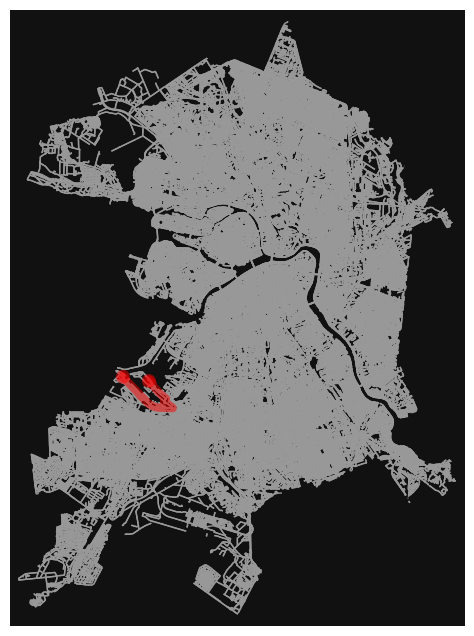

In [7]:
fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r", 
                              route_linewidth=6, node_size=0)

In [11]:
route_nodes_c = ox.routing.shortest_path(G, 6394529837, 7755583697, weight="length")
route_nodes_c

[6394529837,
 10871364001,
 10871364002,
 10871364000,
 10871363974,
 2123624567,
 1707255040,
 5584128460,
 2355505698,
 2355505696,
 2355505691,
 1707254841,
 7878456198,
 6935347778,
 370954642,
 5522501702,
 1707250658,
 11073375645,
 2537360806,
 5996691797,
 10965404867,
 2477811290,
 2477811280,
 488472286,
 1262566567,
 11592756925,
 11592756933,
 11592756927,
 1462584425,
 11592756929,
 11592756930,
 11592756934,
 1462584212,
 6126277751,
 1262566577,
 1262566571,
 599169581,
 599169582,
 649551052,
 10708008713,
 11073375634,
 10708008699,
 11073375629,
 10708008704,
 1263260708,
 1300548350,
 3096766645,
 7153730314,
 262615350,
 1128724800,
 3841723790,
 1595776331,
 1595776330,
 1595630511,
 9705838510,
 9705838511,
 9705838515,
 9705838512,
 9705838516,
 9708925362,
 9708925361,
 9708925360,
 9738215573,
 9708927329,
 9708925359,
 9708925358,
 9708925357,
 9708925356,
 9708927327,
 9708925355,
 9708925354,
 9708925353,
 9708925352,
 9708925351,
 9708925350,
 9708925349,
 

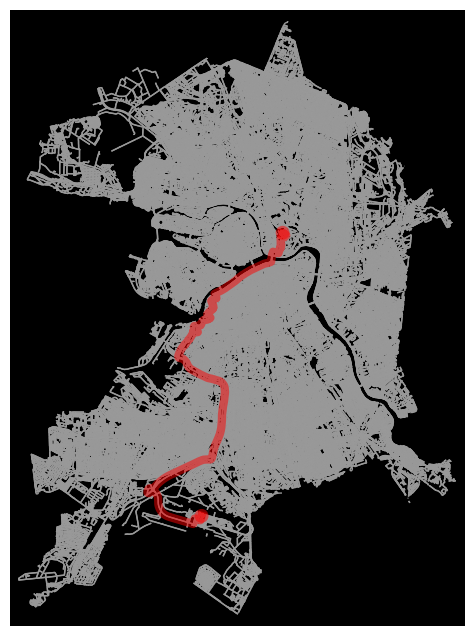

In [12]:
import networkx as nx
route = nx.shortest_path(G, 6394529837, 7755583697)
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [8]:
full_df

,name,lat,lon,geometry,nodes,kind_of,new_nodes
0,Третья стивидорная компания,59.878970,30.213249,"POLYGON ((30.20885 59.88225, 30.20867 59.88216...","[1495854450, 1495854446, 1495854443, 149585441...",port,2501953681
1,Нева-Металл,59.884243,30.203732,"POLYGON ((30.21001 59.88024, 30.21024 59.88037...","[1495854361, 1495854367, 1495854405, 149585443...",port,11491150791
2,Первый Контейнерный Терминал,59.879917,30.205881,"POLYGON ((30.21649 59.87602, 30.21588 59.87632...","[29003159, 29003160, 29003162, 1546437843, 149...",port,4011694191
3,Первая стивидорная компания,59.900097,30.223462,"POLYGON ((30.23869 59.91024, 30.23647 59.90991...","[1496678744, 1496678741, 1496678737, 149667873...",port,10681289131
4,Петербургский нефтяной терминал,59.883287,30.175183,"POLYGON ((30.16799 59.88702, 30.16898 59.88680...","[[[29003480, 29003481, 29003482, 7709497986, 7...",port,8420779355
5,Национальная Служба Санитарной Авиации,59.827914,30.251668,"POLYGON ((30.25103 59.82901, 30.25108 59.82903...","[3770275444, 3362957480, 3770275445, 376706017...",aeroway,11791860344
6,Пулково,59.801699,30.267601,"POLYGON ((30.19901 59.80180, 30.19927 59.80236...","[[[1366336215, 898627137, 898627136, 898627135...",aeroway,7755583697
7,Горелово,59.770235,30.089544,"POLYGON ((30.08709 59.77654, 30.08712 59.77653...","[[[2583764932, 5154999590, 2583764933, 5154999...",aeroway,6472531396
8,Грузовое депо Финляндского вокзала,59.967018,30.361600,"POLYGON ((30.35975 59.96436, 30.35996 59.96426...","[761469028, 761469140, 761469228, 761468989, 7...",landuse,6394529837
9,станция Славянка,59.815769,30.501212,"POLYGON ((30.49884 59.81735, 30.49903 59.81728...","[4771529512, 4771529513, 4771529515, 477152972...",landuse,4771530722
